In [1]:
import gym
import numpy as np

In [2]:
env = gym.make('MountainCar-v0')
env.reset()

observation_space_size = [20] * len(env.observation_space.high)
observation_space_window_size = (env.observation_space.high - env.observation_space.low) / observation_space_size
Q_Table = np.random.uniform(low=-2,high=0,size =(observation_space_size + [env.action_space.n]))

### Lets define our Learning Rate and discount

In [3]:
#Learning Rate here = alpha
alpha = 0.1
#discount is basically like weight which tells us how much important are the future actions/ new rewards vs old reward
discount = 0.95
episodes = 20_000

### Function to convert Continuous states to discrete states

In [4]:
def disc_states(state):
    discrete_state = (state - env.observation_space.low)/observation_space_window_size
    return tuple(discrete_state.astype(int))

In [5]:
discrete_state = disc_states(env.reset())
print(discrete_state)

(7, 10)


In [6]:
Q_Table[discrete_state]

array([-1.53970132, -0.08990266, -0.07943131])

#### How the algo works is that it takes the max value from the array

In [7]:
action_test = np.argmax(Q_Table[discrete_state])
action_test

2

In [8]:
print(f"Means we go with the value {action_test}")

Means we go with the value 2


#### Current Q_Val

In [9]:
current_q_val    = Q_Table[discrete_state + (action_test, )]
current_q_val

-0.07943130812539656

#### Max_Q_Value

1. Maximum possible Q value in next step (for new state)
2. Code Won't run as new_discrete state is undefined to find this state we first need the new_state found after rendering the environment
#### max_future_q_val_test = np.max(Q_Table[new_discrete_state])

### Epsilon


In [10]:
SHOW_EVERY = 3000

# Epsilon Declaration and settings
epsilon = 1  
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = episodes//2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)

## Combining and using it to create our Q-Function

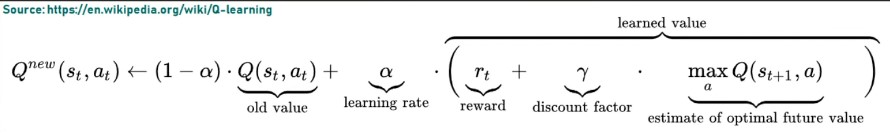

In [11]:
env = gym.make('MountainCar-v0')
env.reset()
#is_alive is used just to check if the environment is still working or it has stopped responding can be skipped as well
is_alive = 200

for episode in range(episodes):
    discrete_state = disc_states(env.reset())
    done = False

    if episode % SHOW_EVERY == 0:
        render = True
        print(episode)
    else:
        render = False

    while not done:
    #if used for getting a random action from Q_Table Exploration purpose
        if np.random.random() > epsilon:
            # Get action from Q table
            action = np.argmax(Q_Table[discrete_state])
        else:
            # Get random action
            action = np.random.randint(0, env.action_space.n)


        new_state, reward, done, _ = env.step(action)

        new_discrete_state = disc_states(new_state)

        if episode % SHOW_EVERY == 0:
            env.render()
        
        #if the simulation didn't ended after the last step update the Q-Table using the Q-Function
        if not done:
            
            #Finding the max Q_Val (estimate of optimal future value)
            max_future_q_val = np.max(Q_Table[new_discrete_state])
            
            current_q_val    = Q_Table[discrete_state + (action, )]
            
            #Q-Function
            new_q_val = (1-alpha) * current_q_val + alpha * (reward + discount * max_future_q_val)
            
            #Updating Q_Table
            Q_Table[discrete_state+(action, )] = new_q_val
        
        #If the simulation is ended(goal state reached can be a reason) then update the Q-Table with the reward i.e., 0
        elif new_state[0] >= env.goal_position:
            
            print(f"Goal state reached: {episode}")
            Q_Table[discrete_state+(action, )] = 0
        discrete_state = new_discrete_state
    #Epsilon Decay 
    if END_EPSILON_DECAYING >= episode and episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value
        
env.close()

0
3000
Goal state reached: 4961
Goal state reached: 4988
Goal state reached: 5000
Goal state reached: 5088
Goal state reached: 5178
Goal state reached: 5500
Goal state reached: 5536
Goal state reached: 5539
Goal state reached: 5541
Goal state reached: 5543
Goal state reached: 5587
Goal state reached: 5592
Goal state reached: 5594
Goal state reached: 5611
Goal state reached: 5625
Goal state reached: 5651
Goal state reached: 5660
Goal state reached: 5740
Goal state reached: 5774
Goal state reached: 5776
Goal state reached: 5786
Goal state reached: 5791
Goal state reached: 5843
Goal state reached: 5870
Goal state reached: 5889
Goal state reached: 5892
Goal state reached: 5896
Goal state reached: 5914
Goal state reached: 5919
Goal state reached: 5920
Goal state reached: 5923
Goal state reached: 5926
Goal state reached: 5939
Goal state reached: 5946
Goal state reached: 5951
Goal state reached: 5953
Goal state reached: 5956
Goal state reached: 5958
Goal state reached: 5973
Goal state reached

Goal state reached: 7672
Goal state reached: 7673
Goal state reached: 7677
Goal state reached: 7680
Goal state reached: 7681
Goal state reached: 7684
Goal state reached: 7686
Goal state reached: 7690
Goal state reached: 7694
Goal state reached: 7696
Goal state reached: 7698
Goal state reached: 7703
Goal state reached: 7710
Goal state reached: 7715
Goal state reached: 7721
Goal state reached: 7726
Goal state reached: 7727
Goal state reached: 7728
Goal state reached: 7734
Goal state reached: 7735
Goal state reached: 7738
Goal state reached: 7739
Goal state reached: 7740
Goal state reached: 7741
Goal state reached: 7744
Goal state reached: 7746
Goal state reached: 7750
Goal state reached: 7751
Goal state reached: 7752
Goal state reached: 7753
Goal state reached: 7755
Goal state reached: 7756
Goal state reached: 7757
Goal state reached: 7760
Goal state reached: 7761
Goal state reached: 7762
Goal state reached: 7763
Goal state reached: 7764
Goal state reached: 7765
Goal state reached: 7767


Goal state reached: 8399
Goal state reached: 8400
Goal state reached: 8401
Goal state reached: 8402
Goal state reached: 8403
Goal state reached: 8405
Goal state reached: 8406
Goal state reached: 8407
Goal state reached: 8408
Goal state reached: 8409
Goal state reached: 8410
Goal state reached: 8411
Goal state reached: 8412
Goal state reached: 8413
Goal state reached: 8414
Goal state reached: 8415
Goal state reached: 8416
Goal state reached: 8417
Goal state reached: 8418
Goal state reached: 8419
Goal state reached: 8420
Goal state reached: 8422
Goal state reached: 8426
Goal state reached: 8428
Goal state reached: 8429
Goal state reached: 8432
Goal state reached: 8433
Goal state reached: 8435
Goal state reached: 8437
Goal state reached: 8438
Goal state reached: 8439
Goal state reached: 8441
Goal state reached: 8442
Goal state reached: 8443
Goal state reached: 8444
Goal state reached: 8445
Goal state reached: 8446
Goal state reached: 8447
Goal state reached: 8448
Goal state reached: 8449


Goal state reached: 8990
Goal state reached: 8995
Goal state reached: 8996
Goal state reached: 8997
Goal state reached: 8998
Goal state reached: 8999
9000
Goal state reached: 9001
Goal state reached: 9002
Goal state reached: 9007
Goal state reached: 9027
Goal state reached: 9034
Goal state reached: 9035
Goal state reached: 9037
Goal state reached: 9038
Goal state reached: 9039
Goal state reached: 9041
Goal state reached: 9042
Goal state reached: 9043
Goal state reached: 9046
Goal state reached: 9050
Goal state reached: 9051
Goal state reached: 9052
Goal state reached: 9055
Goal state reached: 9056
Goal state reached: 9071
Goal state reached: 9076
Goal state reached: 9078
Goal state reached: 9084
Goal state reached: 9090
Goal state reached: 9091
Goal state reached: 9094
Goal state reached: 9095
Goal state reached: 9096
Goal state reached: 9097
Goal state reached: 9106
Goal state reached: 9112
Goal state reached: 9113
Goal state reached: 9114
Goal state reached: 9121
Goal state reached: 

Goal state reached: 9563
Goal state reached: 9564
Goal state reached: 9565
Goal state reached: 9566
Goal state reached: 9567
Goal state reached: 9568
Goal state reached: 9569
Goal state reached: 9570
Goal state reached: 9571
Goal state reached: 9572
Goal state reached: 9573
Goal state reached: 9574
Goal state reached: 9575
Goal state reached: 9576
Goal state reached: 9577
Goal state reached: 9578
Goal state reached: 9579
Goal state reached: 9580
Goal state reached: 9581
Goal state reached: 9582
Goal state reached: 9583
Goal state reached: 9584
Goal state reached: 9585
Goal state reached: 9586
Goal state reached: 9587
Goal state reached: 9588
Goal state reached: 9589
Goal state reached: 9590
Goal state reached: 9591
Goal state reached: 9592
Goal state reached: 9593
Goal state reached: 9594
Goal state reached: 9595
Goal state reached: 9596
Goal state reached: 9597
Goal state reached: 9598
Goal state reached: 9599
Goal state reached: 9600
Goal state reached: 9601
Goal state reached: 9602


Goal state reached: 9918
Goal state reached: 9919
Goal state reached: 9920
Goal state reached: 9921
Goal state reached: 9922
Goal state reached: 9923
Goal state reached: 9924
Goal state reached: 9925
Goal state reached: 9926
Goal state reached: 9927
Goal state reached: 9928
Goal state reached: 9929
Goal state reached: 9930
Goal state reached: 9931
Goal state reached: 9932
Goal state reached: 9933
Goal state reached: 9934
Goal state reached: 9935
Goal state reached: 9936
Goal state reached: 9937
Goal state reached: 9938
Goal state reached: 9939
Goal state reached: 9940
Goal state reached: 9941
Goal state reached: 9942
Goal state reached: 9943
Goal state reached: 9944
Goal state reached: 9945
Goal state reached: 9946
Goal state reached: 9947
Goal state reached: 9948
Goal state reached: 9949
Goal state reached: 9950
Goal state reached: 9951
Goal state reached: 9952
Goal state reached: 9953
Goal state reached: 9954
Goal state reached: 9955
Goal state reached: 9956
Goal state reached: 9957


Goal state reached: 10256
Goal state reached: 10257
Goal state reached: 10258
Goal state reached: 10259
Goal state reached: 10260
Goal state reached: 10261
Goal state reached: 10262
Goal state reached: 10263
Goal state reached: 10264
Goal state reached: 10265
Goal state reached: 10266
Goal state reached: 10267
Goal state reached: 10268
Goal state reached: 10269
Goal state reached: 10270
Goal state reached: 10271
Goal state reached: 10272
Goal state reached: 10273
Goal state reached: 10274
Goal state reached: 10275
Goal state reached: 10276
Goal state reached: 10277
Goal state reached: 10278
Goal state reached: 10279
Goal state reached: 10280
Goal state reached: 10281
Goal state reached: 10282
Goal state reached: 10283
Goal state reached: 10284
Goal state reached: 10285
Goal state reached: 10286
Goal state reached: 10287
Goal state reached: 10288
Goal state reached: 10289
Goal state reached: 10290
Goal state reached: 10291
Goal state reached: 10292
Goal state reached: 10293
Goal state r

Goal state reached: 10582
Goal state reached: 10583
Goal state reached: 10584
Goal state reached: 10585
Goal state reached: 10586
Goal state reached: 10587
Goal state reached: 10588
Goal state reached: 10589
Goal state reached: 10590
Goal state reached: 10591
Goal state reached: 10592
Goal state reached: 10593
Goal state reached: 10594
Goal state reached: 10595
Goal state reached: 10596
Goal state reached: 10597
Goal state reached: 10598
Goal state reached: 10599
Goal state reached: 10600
Goal state reached: 10601
Goal state reached: 10602
Goal state reached: 10603
Goal state reached: 10604
Goal state reached: 10605
Goal state reached: 10606
Goal state reached: 10607
Goal state reached: 10608
Goal state reached: 10609
Goal state reached: 10610
Goal state reached: 10611
Goal state reached: 10612
Goal state reached: 10613
Goal state reached: 10614
Goal state reached: 10615
Goal state reached: 10616
Goal state reached: 10617
Goal state reached: 10618
Goal state reached: 10619
Goal state r

Goal state reached: 10902
Goal state reached: 10903
Goal state reached: 10904
Goal state reached: 10905
Goal state reached: 10906
Goal state reached: 10907
Goal state reached: 10908
Goal state reached: 10909
Goal state reached: 10910
Goal state reached: 10911
Goal state reached: 10912
Goal state reached: 10913
Goal state reached: 10914
Goal state reached: 10915
Goal state reached: 10916
Goal state reached: 10917
Goal state reached: 10918
Goal state reached: 10919
Goal state reached: 10920
Goal state reached: 10921
Goal state reached: 10922
Goal state reached: 10923
Goal state reached: 10924
Goal state reached: 10925
Goal state reached: 10926
Goal state reached: 10927
Goal state reached: 10928
Goal state reached: 10929
Goal state reached: 10930
Goal state reached: 10931
Goal state reached: 10932
Goal state reached: 10933
Goal state reached: 10934
Goal state reached: 10935
Goal state reached: 10936
Goal state reached: 10937
Goal state reached: 10938
Goal state reached: 10939
Goal state r

Goal state reached: 11372
Goal state reached: 11373
Goal state reached: 11374
Goal state reached: 11375
Goal state reached: 11376
Goal state reached: 11377
Goal state reached: 11378
Goal state reached: 11379
Goal state reached: 11380
Goal state reached: 11381
Goal state reached: 11382
Goal state reached: 11383
Goal state reached: 11384
Goal state reached: 11385
Goal state reached: 11386
Goal state reached: 11387
Goal state reached: 11388
Goal state reached: 11389
Goal state reached: 11390
Goal state reached: 11391
Goal state reached: 11392
Goal state reached: 11393
Goal state reached: 11394
Goal state reached: 11395
Goal state reached: 11396
Goal state reached: 11397
Goal state reached: 11398
Goal state reached: 11399
Goal state reached: 11400
Goal state reached: 11401
Goal state reached: 11402
Goal state reached: 11403
Goal state reached: 11404
Goal state reached: 11405
Goal state reached: 11406
Goal state reached: 11407
Goal state reached: 11408
Goal state reached: 11409
Goal state r

Goal state reached: 11712
Goal state reached: 11713
Goal state reached: 11714
Goal state reached: 11715
Goal state reached: 11716
Goal state reached: 11717
Goal state reached: 11718
Goal state reached: 11719
Goal state reached: 11720
Goal state reached: 11721
Goal state reached: 11722
Goal state reached: 11723
Goal state reached: 11724
Goal state reached: 11725
Goal state reached: 11726
Goal state reached: 11727
Goal state reached: 11728
Goal state reached: 11729
Goal state reached: 11730
Goal state reached: 11731
Goal state reached: 11732
Goal state reached: 11733
Goal state reached: 11734
Goal state reached: 11735
Goal state reached: 11736
Goal state reached: 11737
Goal state reached: 11738
Goal state reached: 11739
Goal state reached: 11740
Goal state reached: 11741
Goal state reached: 11742
Goal state reached: 11743
Goal state reached: 11744
Goal state reached: 11745
Goal state reached: 11746
Goal state reached: 11747
Goal state reached: 11748
Goal state reached: 11749
Goal state r

Goal state reached: 12040
Goal state reached: 12041
Goal state reached: 12042
Goal state reached: 12043
Goal state reached: 12044
Goal state reached: 12045
Goal state reached: 12046
Goal state reached: 12047
Goal state reached: 12048
Goal state reached: 12049
Goal state reached: 12050
Goal state reached: 12051
Goal state reached: 12052
Goal state reached: 12053
Goal state reached: 12054
Goal state reached: 12055
Goal state reached: 12056
Goal state reached: 12057
Goal state reached: 12058
Goal state reached: 12059
Goal state reached: 12060
Goal state reached: 12061
Goal state reached: 12062
Goal state reached: 12063
Goal state reached: 12064
Goal state reached: 12065
Goal state reached: 12066
Goal state reached: 12067
Goal state reached: 12068
Goal state reached: 12069
Goal state reached: 12070
Goal state reached: 12071
Goal state reached: 12072
Goal state reached: 12073
Goal state reached: 12074
Goal state reached: 12075
Goal state reached: 12076
Goal state reached: 12077
Goal state r

Goal state reached: 12370
Goal state reached: 12371
Goal state reached: 12372
Goal state reached: 12373
Goal state reached: 12374
Goal state reached: 12375
Goal state reached: 12376
Goal state reached: 12377
Goal state reached: 12378
Goal state reached: 12379
Goal state reached: 12380
Goal state reached: 12381
Goal state reached: 12382
Goal state reached: 12383
Goal state reached: 12384
Goal state reached: 12385
Goal state reached: 12386
Goal state reached: 12387
Goal state reached: 12388
Goal state reached: 12389
Goal state reached: 12390
Goal state reached: 12391
Goal state reached: 12392
Goal state reached: 12393
Goal state reached: 12394
Goal state reached: 12395
Goal state reached: 12396
Goal state reached: 12397
Goal state reached: 12398
Goal state reached: 12399
Goal state reached: 12400
Goal state reached: 12401
Goal state reached: 12402
Goal state reached: 12403
Goal state reached: 12404
Goal state reached: 12405
Goal state reached: 12406
Goal state reached: 12407
Goal state r

Goal state reached: 12697
Goal state reached: 12698
Goal state reached: 12699
Goal state reached: 12700
Goal state reached: 12701
Goal state reached: 12702
Goal state reached: 12703
Goal state reached: 12704
Goal state reached: 12705
Goal state reached: 12706
Goal state reached: 12707
Goal state reached: 12708
Goal state reached: 12709
Goal state reached: 12710
Goal state reached: 12711
Goal state reached: 12712
Goal state reached: 12713
Goal state reached: 12714
Goal state reached: 12715
Goal state reached: 12716
Goal state reached: 12717
Goal state reached: 12718
Goal state reached: 12719
Goal state reached: 12721
Goal state reached: 12722
Goal state reached: 12723
Goal state reached: 12724
Goal state reached: 12725
Goal state reached: 12726
Goal state reached: 12727
Goal state reached: 12728
Goal state reached: 12729
Goal state reached: 12730
Goal state reached: 12731
Goal state reached: 12732
Goal state reached: 12733
Goal state reached: 12734
Goal state reached: 12735
Goal state r

Goal state reached: 13030
Goal state reached: 13031
Goal state reached: 13032
Goal state reached: 13033
Goal state reached: 13034
Goal state reached: 13035
Goal state reached: 13036
Goal state reached: 13037
Goal state reached: 13038
Goal state reached: 13039
Goal state reached: 13040
Goal state reached: 13041
Goal state reached: 13042
Goal state reached: 13043
Goal state reached: 13044
Goal state reached: 13045
Goal state reached: 13046
Goal state reached: 13047
Goal state reached: 13048
Goal state reached: 13049
Goal state reached: 13050
Goal state reached: 13051
Goal state reached: 13052
Goal state reached: 13053
Goal state reached: 13054
Goal state reached: 13055
Goal state reached: 13056
Goal state reached: 13057
Goal state reached: 13058
Goal state reached: 13059
Goal state reached: 13060
Goal state reached: 13061
Goal state reached: 13062
Goal state reached: 13063
Goal state reached: 13064
Goal state reached: 13065
Goal state reached: 13066
Goal state reached: 13067
Goal state r

Goal state reached: 13361
Goal state reached: 13362
Goal state reached: 13363
Goal state reached: 13364
Goal state reached: 13365
Goal state reached: 13366
Goal state reached: 13367
Goal state reached: 13368
Goal state reached: 13369
Goal state reached: 13370
Goal state reached: 13371
Goal state reached: 13372
Goal state reached: 13373
Goal state reached: 13374
Goal state reached: 13375
Goal state reached: 13376
Goal state reached: 13377
Goal state reached: 13378
Goal state reached: 13379
Goal state reached: 13380
Goal state reached: 13381
Goal state reached: 13382
Goal state reached: 13383
Goal state reached: 13384
Goal state reached: 13385
Goal state reached: 13386
Goal state reached: 13387
Goal state reached: 13388
Goal state reached: 13389
Goal state reached: 13390
Goal state reached: 13391
Goal state reached: 13392
Goal state reached: 13393
Goal state reached: 13394
Goal state reached: 13395
Goal state reached: 13396
Goal state reached: 13397
Goal state reached: 13398
Goal state r

Goal state reached: 13693
Goal state reached: 13694
Goal state reached: 13695
Goal state reached: 13696
Goal state reached: 13697
Goal state reached: 13698
Goal state reached: 13699
Goal state reached: 13700
Goal state reached: 13701
Goal state reached: 13702
Goal state reached: 13703
Goal state reached: 13704
Goal state reached: 13705
Goal state reached: 13706
Goal state reached: 13707
Goal state reached: 13708
Goal state reached: 13709
Goal state reached: 13710
Goal state reached: 13711
Goal state reached: 13712
Goal state reached: 13713
Goal state reached: 13714
Goal state reached: 13715
Goal state reached: 13716
Goal state reached: 13717
Goal state reached: 13718
Goal state reached: 13719
Goal state reached: 13720
Goal state reached: 13721
Goal state reached: 13722
Goal state reached: 13723
Goal state reached: 13724
Goal state reached: 13725
Goal state reached: 13726
Goal state reached: 13727
Goal state reached: 13728
Goal state reached: 13729
Goal state reached: 13730
Goal state r

Goal state reached: 14031
Goal state reached: 14032
Goal state reached: 14033
Goal state reached: 14034
Goal state reached: 14035
Goal state reached: 14036
Goal state reached: 14037
Goal state reached: 14038
Goal state reached: 14039
Goal state reached: 14040
Goal state reached: 14041
Goal state reached: 14042
Goal state reached: 14043
Goal state reached: 14044
Goal state reached: 14045
Goal state reached: 14046
Goal state reached: 14047
Goal state reached: 14048
Goal state reached: 14049
Goal state reached: 14050
Goal state reached: 14052
Goal state reached: 14053
Goal state reached: 14054
Goal state reached: 14055
Goal state reached: 14056
Goal state reached: 14057
Goal state reached: 14058
Goal state reached: 14059
Goal state reached: 14060
Goal state reached: 14061
Goal state reached: 14062
Goal state reached: 14063
Goal state reached: 14064
Goal state reached: 14065
Goal state reached: 14066
Goal state reached: 14067
Goal state reached: 14068
Goal state reached: 14069
Goal state r

Goal state reached: 14366
Goal state reached: 14367
Goal state reached: 14368
Goal state reached: 14369
Goal state reached: 14370
Goal state reached: 14371
Goal state reached: 14372
Goal state reached: 14373
Goal state reached: 14374
Goal state reached: 14375
Goal state reached: 14376
Goal state reached: 14377
Goal state reached: 14378
Goal state reached: 14379
Goal state reached: 14380
Goal state reached: 14381
Goal state reached: 14382
Goal state reached: 14383
Goal state reached: 14384
Goal state reached: 14385
Goal state reached: 14386
Goal state reached: 14387
Goal state reached: 14388
Goal state reached: 14389
Goal state reached: 14390
Goal state reached: 14391
Goal state reached: 14392
Goal state reached: 14393
Goal state reached: 14394
Goal state reached: 14395
Goal state reached: 14396
Goal state reached: 14397
Goal state reached: 14398
Goal state reached: 14399
Goal state reached: 14400
Goal state reached: 14401
Goal state reached: 14402
Goal state reached: 14403
Goal state r

Goal state reached: 14704
Goal state reached: 14705
Goal state reached: 14706
Goal state reached: 14707
Goal state reached: 14708
Goal state reached: 14709
Goal state reached: 14710
Goal state reached: 14711
Goal state reached: 14712
Goal state reached: 14713
Goal state reached: 14714
Goal state reached: 14715
Goal state reached: 14716
Goal state reached: 14717
Goal state reached: 14718
Goal state reached: 14719
Goal state reached: 14720
Goal state reached: 14721
Goal state reached: 14722
Goal state reached: 14723
Goal state reached: 14724
Goal state reached: 14725
Goal state reached: 14726
Goal state reached: 14727
Goal state reached: 14728
Goal state reached: 14729
Goal state reached: 14730
Goal state reached: 14731
Goal state reached: 14732
Goal state reached: 14733
Goal state reached: 14734
Goal state reached: 14735
Goal state reached: 14736
Goal state reached: 14737
Goal state reached: 14738
Goal state reached: 14739
Goal state reached: 14740
Goal state reached: 14741
Goal state r

Goal state reached: 15020
Goal state reached: 15021
Goal state reached: 15022
Goal state reached: 15023
Goal state reached: 15024
Goal state reached: 15025
Goal state reached: 15026
Goal state reached: 15027
Goal state reached: 15028
Goal state reached: 15029
Goal state reached: 15030
Goal state reached: 15031
Goal state reached: 15032
Goal state reached: 15033
Goal state reached: 15034
Goal state reached: 15035
Goal state reached: 15036
Goal state reached: 15037
Goal state reached: 15038
Goal state reached: 15039
Goal state reached: 15040
Goal state reached: 15041
Goal state reached: 15042
Goal state reached: 15043
Goal state reached: 15044
Goal state reached: 15045
Goal state reached: 15046
Goal state reached: 15047
Goal state reached: 15048
Goal state reached: 15049
Goal state reached: 15050
Goal state reached: 15051
Goal state reached: 15052
Goal state reached: 15053
Goal state reached: 15054
Goal state reached: 15055
Goal state reached: 15056
Goal state reached: 15057
Goal state r

Goal state reached: 15345
Goal state reached: 15346
Goal state reached: 15347
Goal state reached: 15348
Goal state reached: 15349
Goal state reached: 15350
Goal state reached: 15351
Goal state reached: 15352
Goal state reached: 15353
Goal state reached: 15354
Goal state reached: 15355
Goal state reached: 15356
Goal state reached: 15357
Goal state reached: 15358
Goal state reached: 15359
Goal state reached: 15360
Goal state reached: 15361
Goal state reached: 15362
Goal state reached: 15363
Goal state reached: 15364
Goal state reached: 15365
Goal state reached: 15366
Goal state reached: 15367
Goal state reached: 15368
Goal state reached: 15369
Goal state reached: 15370
Goal state reached: 15371
Goal state reached: 15372
Goal state reached: 15373
Goal state reached: 15374
Goal state reached: 15375
Goal state reached: 15376
Goal state reached: 15377
Goal state reached: 15378
Goal state reached: 15379
Goal state reached: 15380
Goal state reached: 15381
Goal state reached: 15382
Goal state r

Goal state reached: 15666
Goal state reached: 15667
Goal state reached: 15668
Goal state reached: 15669
Goal state reached: 15670
Goal state reached: 15671
Goal state reached: 15672
Goal state reached: 15673
Goal state reached: 15674
Goal state reached: 15675
Goal state reached: 15676
Goal state reached: 15677
Goal state reached: 15678
Goal state reached: 15679
Goal state reached: 15680
Goal state reached: 15681
Goal state reached: 15682
Goal state reached: 15683
Goal state reached: 15684
Goal state reached: 15685
Goal state reached: 15686
Goal state reached: 15687
Goal state reached: 15688
Goal state reached: 15689
Goal state reached: 15690
Goal state reached: 15691
Goal state reached: 15692
Goal state reached: 15693
Goal state reached: 15694
Goal state reached: 15695
Goal state reached: 15696
Goal state reached: 15697
Goal state reached: 15698
Goal state reached: 15699
Goal state reached: 15700
Goal state reached: 15701
Goal state reached: 15702
Goal state reached: 15703
Goal state r

Goal state reached: 15987
Goal state reached: 15988
Goal state reached: 15989
Goal state reached: 15990
Goal state reached: 15991
Goal state reached: 15992
Goal state reached: 15993
Goal state reached: 15994
Goal state reached: 15995
Goal state reached: 15996
Goal state reached: 15997
Goal state reached: 15998
Goal state reached: 15999
Goal state reached: 16000
Goal state reached: 16001
Goal state reached: 16002
Goal state reached: 16003
Goal state reached: 16004
Goal state reached: 16005
Goal state reached: 16006
Goal state reached: 16007
Goal state reached: 16008
Goal state reached: 16009
Goal state reached: 16010
Goal state reached: 16011
Goal state reached: 16012
Goal state reached: 16013
Goal state reached: 16014
Goal state reached: 16015
Goal state reached: 16016
Goal state reached: 16017
Goal state reached: 16018
Goal state reached: 16019
Goal state reached: 16020
Goal state reached: 16021
Goal state reached: 16022
Goal state reached: 16023
Goal state reached: 16024
Goal state r

Goal state reached: 16314
Goal state reached: 16315
Goal state reached: 16316
Goal state reached: 16317
Goal state reached: 16318
Goal state reached: 16319
Goal state reached: 16320
Goal state reached: 16321
Goal state reached: 16322
Goal state reached: 16323
Goal state reached: 16324
Goal state reached: 16325
Goal state reached: 16326
Goal state reached: 16327
Goal state reached: 16328
Goal state reached: 16329
Goal state reached: 16330
Goal state reached: 16331
Goal state reached: 16332
Goal state reached: 16333
Goal state reached: 16334
Goal state reached: 16335
Goal state reached: 16336
Goal state reached: 16337
Goal state reached: 16338
Goal state reached: 16339
Goal state reached: 16340
Goal state reached: 16341
Goal state reached: 16342
Goal state reached: 16343
Goal state reached: 16344
Goal state reached: 16345
Goal state reached: 16346
Goal state reached: 16347
Goal state reached: 16348
Goal state reached: 16349
Goal state reached: 16350
Goal state reached: 16351
Goal state r

Goal state reached: 16636
Goal state reached: 16637
Goal state reached: 16638
Goal state reached: 16639
Goal state reached: 16640
Goal state reached: 16641
Goal state reached: 16642
Goal state reached: 16643
Goal state reached: 16644
Goal state reached: 16645
Goal state reached: 16646
Goal state reached: 16647
Goal state reached: 16648
Goal state reached: 16649
Goal state reached: 16650
Goal state reached: 16651
Goal state reached: 16652
Goal state reached: 16653
Goal state reached: 16654
Goal state reached: 16655
Goal state reached: 16656
Goal state reached: 16657
Goal state reached: 16658
Goal state reached: 16659
Goal state reached: 16660
Goal state reached: 16661
Goal state reached: 16662
Goal state reached: 16663
Goal state reached: 16664
Goal state reached: 16665
Goal state reached: 16666
Goal state reached: 16667
Goal state reached: 16668
Goal state reached: 16669
Goal state reached: 16670
Goal state reached: 16671
Goal state reached: 16672
Goal state reached: 16673
Goal state r

Goal state reached: 16957
Goal state reached: 16958
Goal state reached: 16959
Goal state reached: 16960
Goal state reached: 16961
Goal state reached: 16962
Goal state reached: 16963
Goal state reached: 16964
Goal state reached: 16965
Goal state reached: 16966
Goal state reached: 16967
Goal state reached: 16968
Goal state reached: 16969
Goal state reached: 16970
Goal state reached: 16971
Goal state reached: 16972
Goal state reached: 16973
Goal state reached: 16974
Goal state reached: 16975
Goal state reached: 16976
Goal state reached: 16977
Goal state reached: 16978
Goal state reached: 16979
Goal state reached: 16980
Goal state reached: 16981
Goal state reached: 16982
Goal state reached: 16983
Goal state reached: 16984
Goal state reached: 16985
Goal state reached: 16986
Goal state reached: 16987
Goal state reached: 16988
Goal state reached: 16989
Goal state reached: 16990
Goal state reached: 16991
Goal state reached: 16992
Goal state reached: 16993
Goal state reached: 16994
Goal state r

Goal state reached: 17289
Goal state reached: 17290
Goal state reached: 17291
Goal state reached: 17292
Goal state reached: 17293
Goal state reached: 17294
Goal state reached: 17295
Goal state reached: 17296
Goal state reached: 17297
Goal state reached: 17298
Goal state reached: 17299
Goal state reached: 17300
Goal state reached: 17301
Goal state reached: 17302
Goal state reached: 17303
Goal state reached: 17304
Goal state reached: 17305
Goal state reached: 17306
Goal state reached: 17307
Goal state reached: 17308
Goal state reached: 17309
Goal state reached: 17310
Goal state reached: 17311
Goal state reached: 17312
Goal state reached: 17313
Goal state reached: 17314
Goal state reached: 17315
Goal state reached: 17316
Goal state reached: 17317
Goal state reached: 17318
Goal state reached: 17319
Goal state reached: 17320
Goal state reached: 17321
Goal state reached: 17322
Goal state reached: 17323
Goal state reached: 17324
Goal state reached: 17325
Goal state reached: 17326
Goal state r

Goal state reached: 17620
Goal state reached: 17621
Goal state reached: 17622
Goal state reached: 17623
Goal state reached: 17624
Goal state reached: 17625
Goal state reached: 17626
Goal state reached: 17627
Goal state reached: 17628
Goal state reached: 17629
Goal state reached: 17630
Goal state reached: 17631
Goal state reached: 17632
Goal state reached: 17633
Goal state reached: 17634
Goal state reached: 17635
Goal state reached: 17636
Goal state reached: 17637
Goal state reached: 17638
Goal state reached: 17639
Goal state reached: 17640
Goal state reached: 17641
Goal state reached: 17642
Goal state reached: 17643
Goal state reached: 17644
Goal state reached: 17645
Goal state reached: 17646
Goal state reached: 17647
Goal state reached: 17648
Goal state reached: 17649
Goal state reached: 17650
Goal state reached: 17651
Goal state reached: 17652
Goal state reached: 17653
Goal state reached: 17654
Goal state reached: 17655
Goal state reached: 17656
Goal state reached: 17657
Goal state r

Goal state reached: 17945
Goal state reached: 17946
Goal state reached: 17947
Goal state reached: 17948
Goal state reached: 17949
Goal state reached: 17950
Goal state reached: 17951
Goal state reached: 17952
Goal state reached: 17953
Goal state reached: 17954
Goal state reached: 17955
Goal state reached: 17956
Goal state reached: 17957
Goal state reached: 17958
Goal state reached: 17959
Goal state reached: 17960
Goal state reached: 17961
Goal state reached: 17962
Goal state reached: 17963
Goal state reached: 17964
Goal state reached: 17965
Goal state reached: 17966
Goal state reached: 17967
Goal state reached: 17968
Goal state reached: 17969
Goal state reached: 17970
Goal state reached: 17971
Goal state reached: 17972
Goal state reached: 17973
Goal state reached: 17974
Goal state reached: 17975
Goal state reached: 17976
Goal state reached: 17977
Goal state reached: 17978
Goal state reached: 17979
Goal state reached: 17980
Goal state reached: 17981
Goal state reached: 17982
Goal state r

Goal state reached: 18582
Goal state reached: 18583
Goal state reached: 18584
Goal state reached: 18585
Goal state reached: 18586
Goal state reached: 18587
Goal state reached: 18588
Goal state reached: 18589
Goal state reached: 18590
Goal state reached: 18591
Goal state reached: 18592
Goal state reached: 18593
Goal state reached: 18594
Goal state reached: 18595
Goal state reached: 18596
Goal state reached: 18597
Goal state reached: 18598
Goal state reached: 18599
Goal state reached: 18600
Goal state reached: 18601
Goal state reached: 18602
Goal state reached: 18603
Goal state reached: 18604
Goal state reached: 18605
Goal state reached: 18606
Goal state reached: 18607
Goal state reached: 18608
Goal state reached: 18609
Goal state reached: 18610
Goal state reached: 18611
Goal state reached: 18612
Goal state reached: 18613
Goal state reached: 18614
Goal state reached: 18615
Goal state reached: 18616
Goal state reached: 18617
Goal state reached: 18618
Goal state reached: 18619
Goal state r

Goal state reached: 18903
Goal state reached: 18904
Goal state reached: 18905
Goal state reached: 18906
Goal state reached: 18907
Goal state reached: 18908
Goal state reached: 18909
Goal state reached: 18910
Goal state reached: 18911
Goal state reached: 18912
Goal state reached: 18913
Goal state reached: 18914
Goal state reached: 18915
Goal state reached: 18916
Goal state reached: 18917
Goal state reached: 18918
Goal state reached: 18919
Goal state reached: 18920
Goal state reached: 18921
Goal state reached: 18922
Goal state reached: 18923
Goal state reached: 18924
Goal state reached: 18925
Goal state reached: 18926
Goal state reached: 18927
Goal state reached: 18928
Goal state reached: 18929
Goal state reached: 18930
Goal state reached: 18931
Goal state reached: 18932
Goal state reached: 18933
Goal state reached: 18934
Goal state reached: 18935
Goal state reached: 18936
Goal state reached: 18937
Goal state reached: 18938
Goal state reached: 18939
Goal state reached: 18940
Goal state r

Goal state reached: 19543
Goal state reached: 19544
Goal state reached: 19545
Goal state reached: 19546
Goal state reached: 19547
Goal state reached: 19548
Goal state reached: 19549
Goal state reached: 19550
Goal state reached: 19551
Goal state reached: 19552
Goal state reached: 19553
Goal state reached: 19554
Goal state reached: 19555
Goal state reached: 19556
Goal state reached: 19557
Goal state reached: 19558
Goal state reached: 19559
Goal state reached: 19560
Goal state reached: 19561
Goal state reached: 19562
Goal state reached: 19563
Goal state reached: 19564
Goal state reached: 19565
Goal state reached: 19566
Goal state reached: 19567
Goal state reached: 19568
Goal state reached: 19569
Goal state reached: 19570
Goal state reached: 19571
Goal state reached: 19572
Goal state reached: 19573
Goal state reached: 19574
Goal state reached: 19575
Goal state reached: 19576
Goal state reached: 19577
Goal state reached: 19578
Goal state reached: 19579
Goal state reached: 19580
Goal state r

Goal state reached: 19861
Goal state reached: 19862
Goal state reached: 19863
Goal state reached: 19864
Goal state reached: 19865
Goal state reached: 19866
Goal state reached: 19867
Goal state reached: 19868
Goal state reached: 19869
Goal state reached: 19870
Goal state reached: 19871
Goal state reached: 19872
Goal state reached: 19873
Goal state reached: 19874
Goal state reached: 19875
Goal state reached: 19876
Goal state reached: 19877
Goal state reached: 19878
Goal state reached: 19879
Goal state reached: 19880
Goal state reached: 19881
Goal state reached: 19882
Goal state reached: 19883
Goal state reached: 19884
Goal state reached: 19885
Goal state reached: 19886
Goal state reached: 19887
Goal state reached: 19888
Goal state reached: 19889
Goal state reached: 19890
Goal state reached: 19891
Goal state reached: 19892
Goal state reached: 19893
Goal state reached: 19894
Goal state reached: 19895
Goal state reached: 19896
Goal state reached: 19897
Goal state reached: 19898
Goal state r

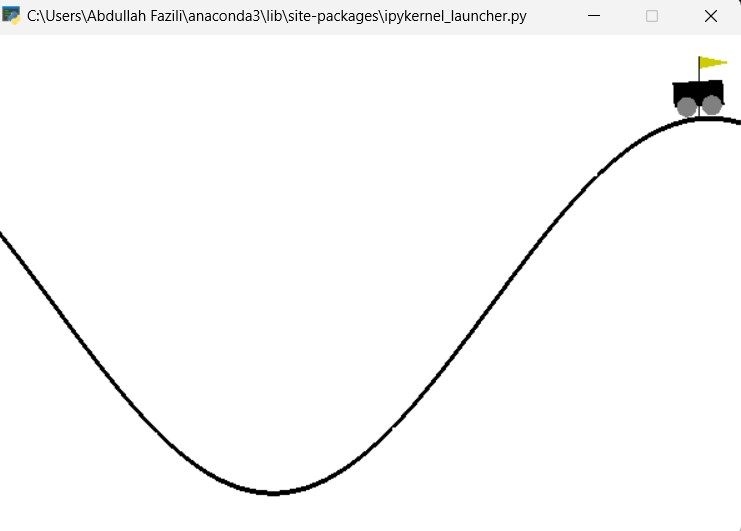

### Visualising the Epsilon Decay

In [12]:
import matplotlib.pyplot as plt

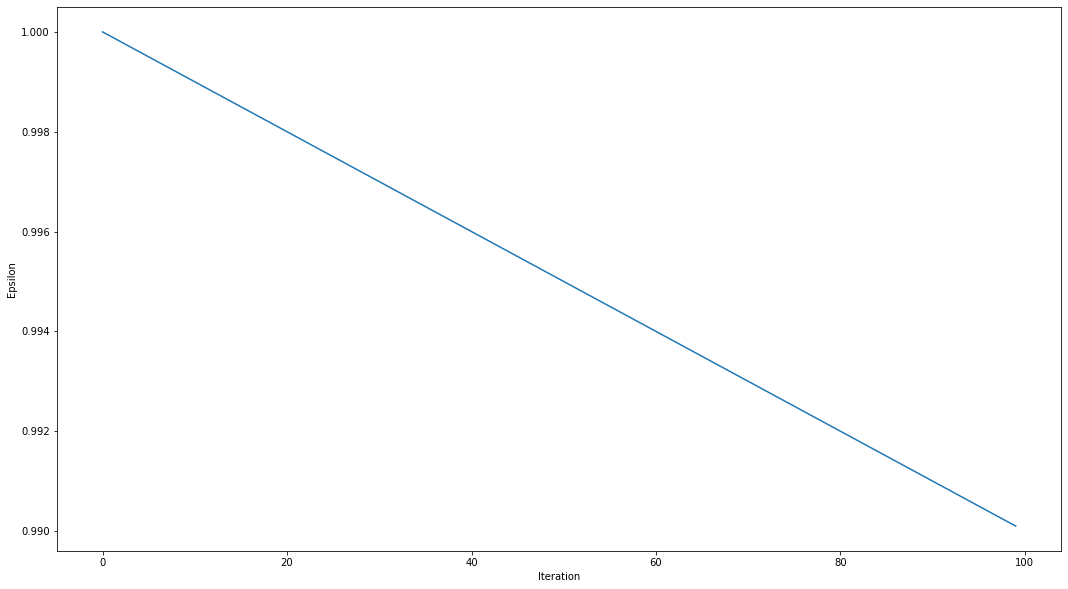

In [17]:
# Define the initial epsilon value and the decay rate
epsilon = 1.0
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = episodes//2
decay_rate = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)

# Create an array of epsilon values that decrease over time
epsilon_values = [epsilon * (1 - decay_rate * i) for i in range(100)]

# Plot the epsilon values
plt.figure(figsize=(18,10))
plt.plot(epsilon_values)
plt.xlabel('Iteration')
plt.ylabel('Epsilon')
plt.show()